In [ ]:
#%%

### ch7. 估值（期权）（Valuation、BSM模型）

# 7.1 期权定价理论
# 7.2 欧式期权估值
# 7.3 BSM（Black-Scholes-Merton）估值
# 7.4 美式期权估值
# 7.5 估算期权溢价（美式期权与欧式期权的差价）

In [ ]:
#%%

# 导入需要的包
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

In [ ]:
#%%

# 7.1 期权估值理论
#################

# 期权定价理论是金融工程学的基础，是金融衍生品定价的基础。
# 使用蒙特卡洛模拟进行未定权益（期权、金融衍生品、混合型工具）的估值
# 教材10.3节，第15、17、18等章都属于这方面的应用。

# 期权定价

'''
**金融衍生工具**是从另一项基础资产中获取价值的工具，衍生产品类型包括远期，期货，掉期和期权等。**期权**是指一种合约，该合约赋予持有人在某一特定日期或该日期之前的任何时间以固定价格购进或售出一种资产的权利，是衍生工具的一种。由于期权交易方式、方向、标的物的不同，产生了众多的期权品种。
**欧式期权和美式期权**：美式期权的买方可以在到期日或之前任一交易日提出执行合约，而欧式期权只能在到期日行权。因此，美式期权的买方权利相对较大。不过美式期权的卖方风险相应也较大。所以同样条件下，美式期权的价格也相对较高。在美国交易的期权大部分是美式的。但是，外汇期权以及一些股票指数期权显然是个例外。
常见的**期权定价模型**有两种。一是著名的Black Scholes期权定价模型（假定连续的随机过程），二是Cox-Ross-Rubinstein期权定价模型（假定离散的随机过程）。

## Black Scholes期权定价模型

布莱克-舒尔斯模型（Black-Scholes Model），简称BS模型，是一种为期权或权证等金融衍生工具定价的数学模型，由美国经济学家迈伦·舒尔斯（Myron Scholes）与费雪·布莱克（Fischer Black）首先提出，并由罗伯特·墨顿（Robert C. Merton）完善。该模型就是以迈伦·舒尔斯和费雪·布莱克命名的。1997年迈伦·舒尔斯和罗伯特·墨顿凭借该模型获得诺贝尔经济学奖。然而它假设价格的变动，会符合高斯分布（即俗称的钟形曲线），但在财务市场上经常出现符合统计学肥尾现象的事件，这影响此公式的有效性。

Black Scholes期权定价公式作了一些假设。

- 首先是市场没有套利。这意味着不可能有价格差异。
- 第二个假设是基础资产价格遵循布朗运动。
- 第三个假设表明基础股票不支付任何股息。（**因此对于有股息的情况需要做相应处理**）
- 第四个假设是不涉及交易成本，并且可以以任何分数进行基础股票的买卖。
- 最后一个假设是我们知道短期利率，并且该利率随时间是恒定的。

BS 模型对市场的假设有：

- 两种资产：债券（无风险资产）、股票（风险资产）；
- No Arbitrage，市场是无套利的，一旦出现套利机会价格就会被修正；
- 可以以任意数量做多或做空资产，即可以无限细分资产，可以做空股票，可以借钱；
- Frictionless，不存在交易摩擦。

BS 模型对两种资产价格的假设有：

- 股票无分红(No Dividend)，股价服从参数为常数的几何布朗运动（GBM, Geometric Brownian Motion），即服从随机微分方程（SDE, Stochastic Differential Equation）;
- 利率为常数，债券收益为连续复利。

我们不需要知道如何得出Black Scholes期权定价公式。我们只需要在公式中插入不同的参数，例如看涨/卖出期权，股票价格，执行价格，短期利率，隐含波动率等。现在的问题是我们没有任何方法可以计算隐含波动率。我们只是假设了隐含波动率公式。我们还可以计算看跌期权的价格。例如：苹果股价为130美元。看跌期权的行使价为135美元。有效期为3个月。短期利率为2％。隐含波动率为22％。通过公式可以计算期刊定价为8.214834

Black Scholes期权定价公式很大​​程度上取决于隐含波动率。隐含波动率是我们所不知道的。因此，实际上我们不能使用此Black Scholes股票期权价格公式。在大多数情况下，我们使用相反的公式。我们在公式中插入股票期权价格并计算隐含波动率。我们可以使用GARCH模型来计算波动率。

## Cox-Ross-Rubinstein期权定价模型

Cox-Ross-Rubinstein公式也称为CRR公式，与Black Scholes股票期权定价公式不同。CRR公式中的基本假设是标的股票价格遵循离散的二项分布。这意味着股票价格在每个时期要么上升一定量，要么下降一定量。二叉树正在重组。这意味着在两个时期内，价格可以先涨后跌，或者在相同的最终价格下涨跌。

这是由于两个公式的数学推导不同。在Black Scholes公式中，我们假设一个连续的随机公式，而在Cox-Ross-Rubinstein公式中，我们假设一个离散的二项式公式。W可以通过减少Cox-Ross-Rubinstein公式中的时间步长来减少价格差异。

## 隐含波动率与BSM

**隐含波动率**，是根据当前期权的市场价格及BS期权定价公式反推得出的。隐含波动率时市场中期权价格所蕴含的波动率，价格和隐含波动率之间是一一对应的，交易者和经纪人经常使用隐含波动率而非价格。
**历史波动率**，是最近20个交易日股价日涨幅的统计标准差。年化波动率就是根号下256乘以每天的标准差，月波动率是20^0.5*日标准差。 比如，若日涨幅统计标准差是1%，那么年波动率就是16%，月波动率就是4.5%。
**未来实际波动率**，是未来的20天的波动率。 比方说，在2020.7.28日收盘时，从2020.7.1-7.28日这20个交易日统计，就是历史波动率。从2020.7.29-8.25日，这20个交易日统计，就是7.28日的股价未来实际波动率。 当然，在7.28日当天，我们是不知道未来20天的实际波动率是多少的。

实际数据，上证50ETF股价日涨幅。 从2020.7.1-7.28日，这20个交易日数据的统计期望值是μ=+0.483%，标准差σ=2.84%；历史波动率就是年化45.44%。 在2020.7.28日，上证50ETF正股价格是3.231元，平值购12月3200的期权价格是0.2167元/份，剩余期限是148天。根据BS期权定价公式反推的隐波大约是年化20%。 从2020.7.29-8.25日，未来实际波动率；统计得到μ=+0.1995%，σ=1.05%；年化实际波动率16.8%。
顺便比较一下，平值沽12月3200，剩余148天，在2020.7.28日的收盘价是0.1901元。 
当前2020.11.25日，剩余28天的沽12月3200价格是0.0062元，隐波是22.01%；正股股价是3.499元；而购12月3200已变成深度实值期权，价格是0.3122元，隐波是18.98%，剩余28天。
在2020.6.30日，上证50ETF收盘2.956元，当时剩余176天的购12月3200的价格是0.0460元，隐波是很低的年化13%。从2020.6.1-6.30日，20个交易日的数据统计期望值是0.272%，标准差是0.824%，年化历史波动率也是很低的13.18%。而谁又能料到，未来20天的实际波动率高达45%。
当我们买入认购期权时，除了希望标的正股的股价上涨，还希望隐含波动率也变大。可是，从上面的两个案例，可以看出，隐含波动率的变化也是很难预料的。在第一个案例中，隐含波动率是正常的20%，比历史波动率45%小很多，比未来实际波动率17%差不多。而在紧接着的第二个案例中，隐波是13%，与历史波动率13%相当，但比未来实际波动率45%小很多。
一般，我们把波动率年20%作为一个均值回归线，**如果当前的隐含波动率低于20%，那么买入认购期权是可以期待股价与波动率同时上升的**。而如果期权的隐含波动率已经高达30%以上，就不要再做期权买方了。 比方说，在2020.7.6日，股价继续暴涨一天+9%，收盘3.469元；当时的期权波动率也飙升到40%。理智的讲，不管7.7日第二天股价预计是涨还是跌，都应该清仓认购或认沽期权持仓；因为，波动率会很快就回归到一般正常的20%附近。 实际情形，在7.7日，股价高开低走，当时的剩余170天的平值购12月3400从开盘最高0.5988元大幅下跌至0.2601元，大幅减值一半。 对于当时的剩余30天的短期虚值期权更是一天就大幅减值80%以上；即使后面股价大幅反弹上涨，也得涨5倍才能回本。
'''
print("准备好了！")

准备好了！


In [ ]:
#%%

# 7.2 欧式期权 European Options
#############################
# gen_sn函数用于生成模拟的随机数
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation. 
    Parameters
    ==========
    M : int; number of time intervals for discretization # 时间间隔数
    I : int; number of paths to be simulated # 模拟路径数
    anti_paths: boolean; use of antithetic variates # 是否使用反向路径
    mo_math : boolean; use of moment matching # 是否使用矩匹配
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2))) # half paths; 半路径
        sn = np.concatenate((sn, -sn), axis=1)  # antithetic variates; 反向路径
    else:
        sn = npr.standard_normal((M + 1, I)) # full paths; 全路径
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std() # moment matching; 矩匹配
    return sn

S0 = 100.        # initial index level; 初始指数水平
r = 0.05         # constant short rate; 短期利率常数
sigma = 0.25     # constant volatility; 波动率常数
T = 1.0          # in years; 期权到期时间
I = 50000        # number of simulations; 模拟次数

print("准备就绪......")

准备就绪......


In [ ]:
#%%

# 风险中立预期定价
# gbm_mcs_stat函数用于估算欧式期权的风险中立预期定价, 使用蒙特卡洛模拟(到期时的指数水平)
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    Parameters
    ==========
    K : float; (positive) strike price of the option  # 行权价
    Returns
    =======
    C0 : float; estimated present value of European call option # 欧式看涨期权的风险中立预期定价
    '''
    sn = gen_sn(1, I) # generate random numbers; 生成随机数
    # simulate index level at maturity; 模拟到期时的指数水平
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    # calculate payoff at maturity; 计算到期时的回报
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator; 计算蒙特卡洛估算值
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

a0=gbm_mcs_stat(K=105.)
print("考虑行权价K=105时的风险中立预期定价为(%.4f)"%(a0))

考虑行权价K=105时的风险中立预期定价为(10.0217)


In [ ]:
#%%

# 看涨和看跌期权的价格估算

M = 50 # number of time steps; 时间步数
# gbm_mcs_dyna函数用于估算欧式期权的风险中立预期定价, 使用蒙特卡洛模拟(指数水平路径)
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    Parameters
    ==========
    K : float; (positive) strike price of the option # 行权价
    option : string; type of the option to be valued ('call', 'put')   # 期权类型(看涨、看跌)
    Returns
    =======
    C0 : float; estimated present value of European call option # 欧式看涨期权的风险中立预期定价
    '''
    dt = T / M # length of time interval; 时间间隔长度
    # simulation of index level paths
    S = np.zeros((M + 1, I)) # index level matrix; 指数水平矩阵
    S[0] = S0 # initial index level; 初始指数水平
    sn = gen_sn(M, I) # random numbers; 随机数
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])  # index values at time t; 时间t的指数水平
    # case-based calculation of payoff; 基于情况的回报计算
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator; 计算蒙特卡洛估算值
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT) 
    return C0

a1=gbm_mcs_dyna(K=110., option='call')
a2=gbm_mcs_dyna(K=110., option='put')
print("相同行权价K=110的看涨(%.4f)和看跌（%.4f)期权的价格估算"%(a1,a2))

相同行权价K=110的看涨(8.0878)和看跌（12.6660)期权的价格估算


相同行权价K=110的BSM(8.0264)期权价格估算


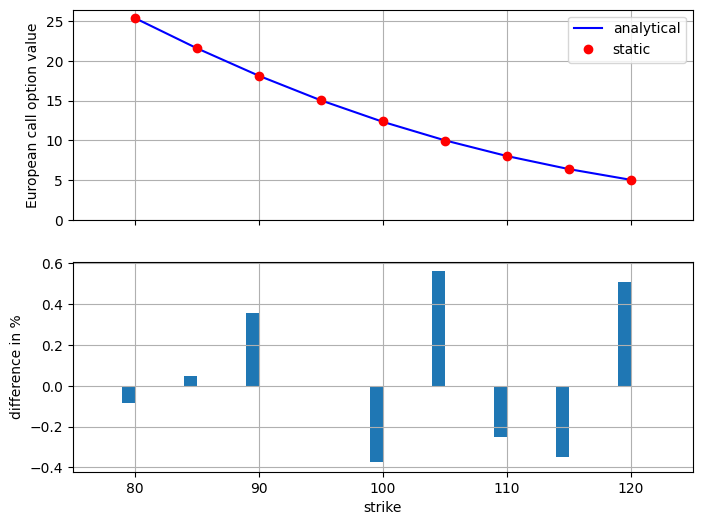

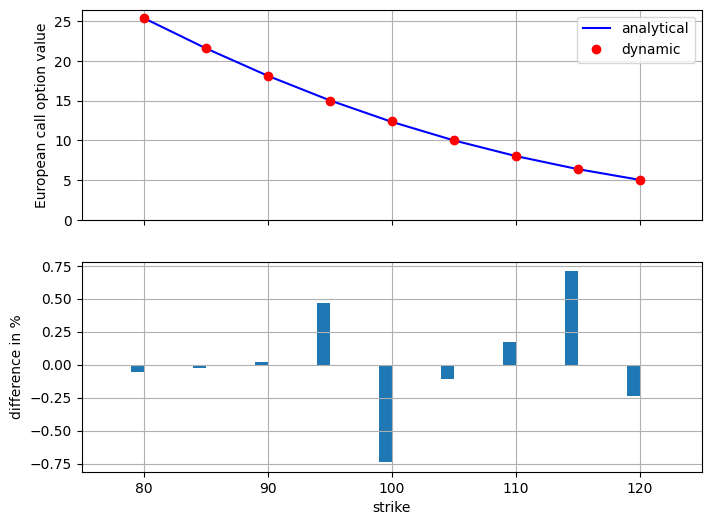

In [ ]:
#%%

# 7.3 BSM（Black-Scholes-Merton）估值
####################################

#注意bsm_functions包不能通过pip等方式安装，
#需要去github上下载bsm_functions.py文件并放到代码相同文件夹下。
#下载地址：https://github.com/yhilpisch/arpm/blob/master/bsm_functions.py
from functions_bsm import bsm_call_value

# bsm_call_value函数用于计算BSM模型的欧式看涨期权价格(参数 S0, K, T, r, sigma 分别表示初始指数水平、行权价、到期时间、短期利率、波动率)
a3 = bsm_call_value(S0, 110, T, r, sigma)
print("相同行权价K=110的BSM(%.4f)期权价格估算"%(a3))

stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80., 120.1, 5.) # strike price list; 行权价列表
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K)) # 静态蒙特卡洛估算
    dyna_res.append(gbm_mcs_dyna(K)) # 动态蒙特卡洛估算
    anal_res.append(bsm_call_value(S0, K, T, r, sigma)) # BSM模型估算
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

# 画图比较静态和BSM模型估算的期权价格
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)
# title: Comparsion of static and dynamic Monte Carlo estimator values; 静态和动态蒙特卡洛估算值的比较
#plt.show()

# 画图比较动态和BSM模型估算的期权价格
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)
# tag: opt_val_comp_2
# title: Comparsion of static and dynamic Monte Carlo estimator values
plt.show()

In [ ]:
#%%

# 7.4 美式期权 American Options
##############################

# gbm_mcs_amer函数用于估算美式期权的风险中立预期定价, 使用蒙特卡洛模拟(指数水平路径)
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option # 行权价
    option : string
        type of the option to be valued ('call', 'put') # 期权类型(看涨、看跌)
    
    Returns
    =======
    C0 : float
        estimated present value of European call option # 美式看涨期权的风险中立预期定价
    '''
    dt = T / M # length of time interval; 时间间隔长度
    df = np.exp(-r * dt) # discount factor per time interval; 每个时间间隔的贴现因子
    # simulation of index levels; 指数水平的模拟
    S = np.zeros((M + 1, I)) # index level matrix; 指数水平矩阵
    S[0] = S0 # initial index level; 初始指数水平
    sn = gen_sn(M, I) # random numbers; 随机数
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])  # index values at time t; 时间t的指数水平
    # case based calculation of payoff; 基于情况的回报计算
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm; LSM算法
    V = np.copy(h) # value matrix; 价值矩阵
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7) # polynomial regression; 多项式回归
        C = np.polyval(reg, S[t]) # evaluation of polynominal; 多项式评估
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t]) # exercise decision; 行权决策
    # MCS estimator; MCS估算值
    C0 = df * 1 / I * np.sum(V[1]) # LSM estimator; LSM估算值
    return C0

a1=gbm_mcs_amer(110., option='call')
a2=gbm_mcs_amer(110., option='put')
print("美式期权:行权价K=110时看涨(%.4f)和看跌（%.4f)期权的价格估算"%(a1,a2))

美式期权:行权价K=110时看涨(7.7789)和看跌（13.6140)期权的价格估算


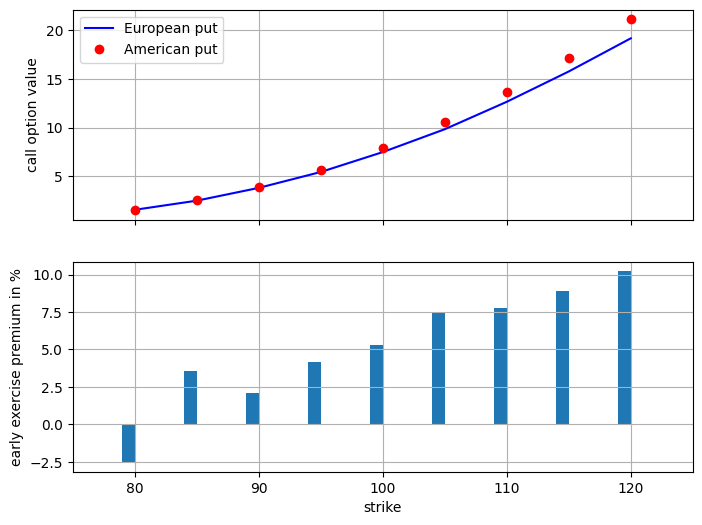

In [ ]:
#%%

# 7.5 估算期权溢价（美式期权与欧式期权的差价）
##########################################

euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.) # strike price list; 行权价列表
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put')) # 欧式看跌期权的风险中立预期定价
    amer_res.append(gbm_mcs_amer(K, 'put')) # 美式看跌期权的风险中立预期定价
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

# 画图比较欧式和美式期权的价格
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)
# tag: opt_euro_amer
# title: Comparsion of European and LSM Monte Carlo estimator values
plt.show()

In [ ]:
#%%

#################END########################